<a href="https://colab.research.google.com/github/Piaiai/My-pets/blob/master/ORO_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
!unzip -uq "/content/ОРО_Лб_2_jpg.zip"

EZ_6.jpg


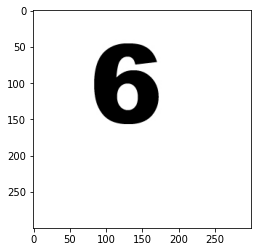

In [ ]:
import os
import random
import cv2 

known_obj_dir = '/content/ОРО_Лб_2_jpg/_Bank_E/'
unknow_obj_dir = '/content/ОРО_Лб_2_jpg/_Bank_U/'

img_path = random.choice(os.listdir(known_obj_dir))
print(img_path)
img = cv2.imread(known_obj_dir + img_path, 1)

plt.imshow(img)

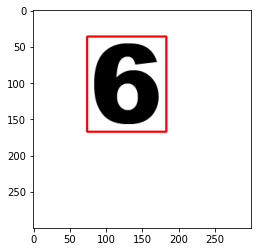

In [ ]:
import numpy as np
import pandas as pd

def defineBounds(img):
    img_blur = cv2.bilateralFilter(img, d = 7, sigmaSpace = 75, sigmaColor =75)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    a = img_gray.max()  
    _, thresh = cv2.threshold(img_gray, a/2, a,cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(image = thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
    c_0 = contours[0]

    x, y, w, h = cv2.boundingRect(c_0)
    return (x-10, y-10, w+20, h+20)

def classify(unknown_img_path, known_objects_dir):
    unknown_img = cv2.imread(unknown_img_path)
    dist = 100000000.0
    img_name = ''
    for key in os.listdir(known_objects_dir):
        etalon_img = cv2.imread(known_objects_dir + key)
        res = cv2.matchTemplate(etalon_img, unknown_img, cv2.TM_SQDIFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if min_val < dist: 
            dist = min_val
            img_name = key
    return img_name, dist


answers = []
for unknown_img_name in os.listdir(unknow_obj_dir):
     answer, distance = classify(unknow_obj_dir + unknown_img_name, known_obj_dir)
     answers.append((unknown_img_name, distance, answer))



x, y, w, h = defineBounds(img)
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)
plt.imshow(img_box)


In [ ]:
df = pd.DataFrame(answers, columns =['Неизвестный объект', 'Расстояние d', 'имя файла']) 
df

,Неизвестный объект,Расстояние d,имя файла
0,390512.jpg,3160.0,EZ_6.jpg
1,390513.jpg,0.0,EZ_8.jpg
2,390519.jpg,1776.0,EZ_4.jpg
3,390521.jpg,2298.0,EZ_1.jpg
4,390516.jpg,0.0,EZ_2.jpg
5,390518.jpg,6162.0,EZ_0.jpg
6,390515.jpg,3036.0,EZ_3.jpg
7,390517.jpg,1892.0,EZ_5.jpg
8,390514.jpg,1794.0,EZ_9.jpg
9,390520.jpg,1208.0,EZ_7.jpg
